План работы:
1. Подготовка к анализу, подключение библиотек и источников данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Анализ результатов А/В теста
5. Выводы

Данные:  
/datasets/ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год;  
/datasets/final_ab_new_users.csv — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;  
/datasets/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;  
/datasets/final_ab_participants.csv — таблица участников тестов.  

Цель исследования:  
Оценка результатов А/В теста

## Подготовка к анализу, подключение библиотек и источников данных

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats as st
import math as mth
from pandas.plotting import register_matplotlib_converters
import warnings
import datetime as dt
import plotly.express as px

In [91]:
try:
    project_marketing = pd.read_csv('ab_project_marketing_events.csv')
    new_users = pd.read_csv('final_ab_new_users.csv')
    events = pd.read_csv('final_ab_events.csv')
    participants = pd.read_csv('final_ab_participants.csv')
except:
    project_marketing = pd.read_csv('/datasets/ab_project_marketing_events.csv')
    new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    events = pd.read_csv('/datasets/final_ab_events.csv')
    participants = pd.read_csv('/datasets/final_ab_participants.csv')
    

In [92]:
project_marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [93]:
project_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [94]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [95]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [96]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [97]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [98]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [99]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


Много пропусков в столбце details таблицы events  
Даты не приведены к типу datetime

## Предобработка данных

In [100]:
project_marketing['start_dt'] = pd.to_datetime(project_marketing['start_dt'])
project_marketing['finish_dt'] = pd.to_datetime(project_marketing['finish_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])

In [101]:
participants.duplicated().sum()

0

In [102]:
project_marketing.duplicated().sum()

0

In [103]:
new_users.duplicated().sum()

0

In [104]:
events.duplicated().sum()

0

В исходных таблицах нет явных дубликатов

In [105]:
participants['group'].unique()

array(['A', 'B'], dtype=object)

In [106]:
participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [107]:
print('Пользователей, которые попали одновременно в несколько разных А/В тестов всего:', participants.duplicated(subset=['user_id']).sum())

Пользователей, которые попали одновременно в несколько разных А/В тестов всего: 1602


Возможны 2 варианта: либо один клиент попал в два разных теста - тут ничего страшного нет, либо один клиент попал в две разные группы в одном тесте - это означает что тест проведен некорректно.  
Какой из вариантов в нашем случае посмотрим дальше

In [108]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [109]:
print('Самая ранняя дата в таблице events:', events['event_dt'].min())

Самая ранняя дата в таблице events: 2020-12-07 00:00:33


In [110]:
print('Самая поздняя дата в таблице events:', events['event_dt'].max())

Самая поздняя дата в таблице events: 2020-12-30 23:36:33


In [111]:
events.loc[events['details'].isna()]['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

In [112]:
new_users['user_id'].duplicated().sum()

0

В таблице new_users нет повторяющихся id пользователей

In [113]:
print('Самая ранняя дата регистрации:', new_users['first_date'].min())

Самая ранняя дата регистрации: 2020-12-07 00:00:00


In [114]:
print('Самая поздняя дата регистрации:', new_users['first_date'].max())

Самая поздняя дата регистрации: 2020-12-23 00:00:00


In [115]:
new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [116]:
new_users['region'].value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [117]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [118]:
new_users.merge(participants, on='user_id', how='left')['region'].value_counts()

EU           47872
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

Разбиение новых пользователей по регионам

In [119]:
new_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [120]:
new_users['device'].value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

Разбиение новых пользователей по устройствам

Большинство новых пользователей из EU, на втором месте N. America. Среди устройств самые популярные - android смартфоны, на втром месте ПК.

In [121]:
user_data = events.merge(participants,on='user_id', how='left')\
    .merge(new_users, on='user_id', how='left')
user_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN,2020-12-07,EU,Android


In [122]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446211 entries, 0 to 446210
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     446211 non-null  object        
 1   event_dt    446211 non-null  datetime64[ns]
 2   event_name  446211 non-null  object        
 3   details     63588 non-null   float64       
 4   group       106625 non-null  object        
 5   ab_test     106625 non-null  object        
 6   first_date  446211 non-null  datetime64[ns]
 7   region      446211 non-null  object        
 8   device      446211 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 34.0+ MB


In [123]:
user_data['details'] = user_data['details'].fillna(0)

Заполняем пропуски в details значением 0, т.к. это поле содержит стоимость заказа, т.е. может иметь ненулевые значения только для заказов

In [124]:
user_data = user_data.query('ab_test == "recommender_system_test"')

Отфильтровали нерелевантные тесты

In [125]:
q = user_data['details'].quantile(0.99)

In [126]:
user_data = user_data.query('details < @q')

Удалили выбросы из поля details

In [127]:
user_data['date'] = user_data['event_dt'].dt.date

Добавили отдельный столбец для даты события

Вывод по предобработке:
- Столбцы, содержащие даты, преобразованы к типу datetime
- Пропуски в таблице events столбце details заменены значением 0, данное поле содержит информацию о сумме заказа, поэтому актуально только для события purchase.
- Явных дубликатов в таблицах не найдено
- Получена таблица user_data как объединение таблиц events, participants, new_users по user_id через left join
- В таблице user_data добавлен столбец date, содержащий дату события, извлеченную из event_dt
- Удалены выбросы из столбца details таблицы user_data, считаем выбросами значения details больше 99 процентиля

Предобрабтка данных нужна для подготовки данных к анализу. 

### Проверяем соответствие данных ТЗ

In [128]:
user_data['first_date'].min()

Timestamp('2020-12-07 00:00:00')

In [129]:
user_data['first_date'].max()

Timestamp('2020-12-21 00:00:00')

In [130]:
user_data['event_dt'].max()

Timestamp('2020-12-30 12:42:57')

In [131]:
events['event_dt'].max()

Timestamp('2020-12-30 23:36:33')

Данные не соответствуют ТЗ, не хватает данных за еще 5 дней

In [132]:
user_data['first_date'].isna().sum()

0

In [133]:
user_data.drop_duplicates(subset=['user_id'])['region'].value_counts()

EU           3481
N.America     119
APAC           45
CIS            30
Name: region, dtype: int64

In [134]:
new_users.merge(participants, on='user_id', how='left')\
    .query('ab_test == "recommender_system_test"')['region'].value_counts()


EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64

Число участников совпадает с ожидаемым

In [135]:
new_users.duplicated(subset=['user_id']).sum()

0

In [136]:
participants.query('ab_test == "recommender_system_test"').duplicated(subset=['user_id']).sum()

0

Группы теста не пересекаются

In [137]:
participants.groupby(by=['ab_test', 'group']).agg({'group':'count'})

group
ab_test                 group       
interface_eu_test       A       5831
                        B       5736
recommender_system_test A       3824
                        B       2877

In [138]:
participants['user_id'].nunique()

16666

In [139]:
events['user_id'].nunique()

58703

In [140]:
new_users['user_id'].nunique()

61733

Всего в А/В тесте участвуют 16666 пользователей, из зарегистрировавшихся за период 61733. Данные о событиях есть для 58703 пользователей

In [141]:
def filter_event(row):
    if 'EU' in row[1].split(','):
        if row[2] > datetime(2020, 12, 1):
            return 1
        elif row[3] > datetime(2020, 12, 1):
            return 1
        elif row[2] < datetime(2020, 12, 1) and row[3] > datetime(2020, 12, 1):
            return 1
        else:
            return 0
    else:
        return 0

In [142]:
project_marketing['mask'] = project_marketing.apply(filter_event, axis=1)

In [143]:
project_marketing.query('mask == 1')

,name,regions,start_dt,finish_dt,mask
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,1


In [144]:
user_data['date'] = pd.to_datetime(user_data['date'])

In [145]:
def date_diff(row):
#    d1 = datetime.strptime(str(row[6]), "%Y-%m-%d")
#    d2 = datetime.strptime(str(row[9]), "%Y-%m-%d")
    return abs((row[9] - row[6]).days)

In [146]:
user_data['date_diff'] = user_data.apply(date_diff, axis=1
                                        )

In [147]:
user_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,date,date_diff
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,0
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
75,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
94,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0


In [148]:
user_data.query('date_diff > 14').count()

user_id       618
event_dt      618
event_name    618
details       618
group         618
ab_test       618
first_date    618
region        618
device        618
date          618
date_diff     618
dtype: int64

In [149]:
user_data = user_data.query('date_diff <= 14')

In [150]:
user_data.groupby(by='group').agg({'user_id':'nunique'})

,user_id
group,
A,2747
B,928


In [151]:
print('Всего после фильтрации осталось уникальных пользователей:', user_data['user_id'].nunique())

Всего после фильтрации осталось уникальных пользователей: 3675


Вывод по проверке.  
Данные примерно соответствуют ТЗ. Не хватает данных за 5 дней (31.12 - 4.01), аудитория теста 10% новых пользователей (вместо 15% по ТЗ: всего 61 тыс новых пользователей, среди них 6 тыс участвуют в тесте), группы теста не пересекаются, есть пересечения групп с новогодними акциями

## Исследовательсий анализ данных

- Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

In [152]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23728 entries, 5 to 446160
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23728 non-null  object        
 1   event_dt    23728 non-null  datetime64[ns]
 2   event_name  23728 non-null  object        
 3   details     23728 non-null  float64       
 4   group       23728 non-null  object        
 5   ab_test     23728 non-null  object        
 6   first_date  23728 non-null  datetime64[ns]
 7   region      23728 non-null  object        
 8   device      23728 non-null  object        
 9   date        23728 non-null  datetime64[ns]
 10  date_diff   23728 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 2.2+ MB


In [153]:
data_grouped = user_data.groupby(by=['group']).agg({'event_name':'count', 'user_id':'nunique'})\
    .rename(columns={'event_name':'event_count', 'user_id':'user_count'})
data_grouped['event_per_user'] = data_grouped['event_count']/data_grouped['user_count']
data_grouped

,event_count,user_count,event_per_user
group,,,
A,18668,2747,6.795777
B,5060,928,5.452586


In [154]:
data_grouped = user_data.groupby(by=['group', 'date']).agg({'user_id':'count'}).reset_index()

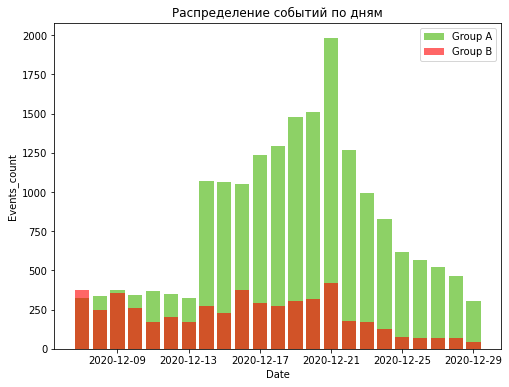

In [155]:
#Plotting multiple sets of data
x1= data_grouped.query('group == "A"')['date']
x2= data_grouped.query('group == "B"')['date']
y1 = data_grouped.query('group == "A"')['user_id']
y2= data_grouped.query('group == "B"')['user_id']
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("white")
plt.bar(x1,y1,label = "Group A",color = '#42B300', alpha=0.6) # First set of data
plt.bar(x2,y2,label = "Group B",color = 'red', alpha=0.6) # Second set of data
plt.xlabel('Date')
plt.ylabel('Events_count')
plt.title ('Распределение событий по дням')
plt.legend()
plt.show()

Распределение числа событий в группе А напоминает нормальное, в группе В - равномерное

In [156]:
data_grouped = user_data.groupby(by=['group', 'event_name']).agg({'user_id':'nunique'})\
    .reset_index()

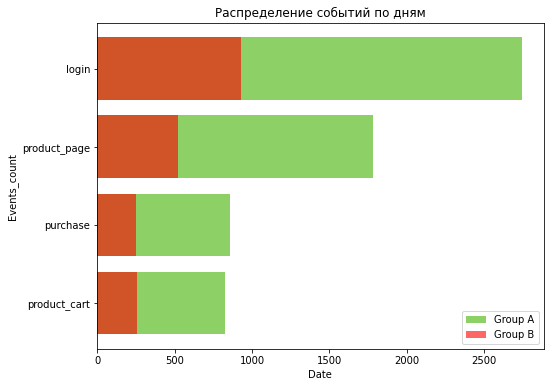

In [157]:
x1= data_grouped.sort_values(by='user_id').query('group == "A"')['event_name']
x2= data_grouped.sort_values(by='user_id').query('group == "B"')['event_name']
y1 = data_grouped.sort_values(by='user_id').query('group == "A"')['user_id']
y2= data_grouped.sort_values(by='user_id').query('group == "B"')['user_id']
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("white")
plt.barh(x1,y1,label = "Group A",color = '#42B300', alpha=0.6) # First set of data
plt.barh(x2,y2,label = "Group B",color = 'red', alpha=0.6) # Second set of data
plt.xlabel('Date')
plt.ylabel('Events_count')
plt.title ('Распределение событий по дням')
plt.legend()
plt.show()

In [158]:
data_grouped

,group,event_name,user_id
0,A,login,2747
1,A,product_cart,824
2,A,product_page,1780
3,A,purchase,855
4,B,login,927
5,B,product_cart,255
6,B,product_page,523
7,B,purchase,253


In [159]:
def priority(row):
    if row[0] == 'A':
        if row[1] == 'login':
            return 11
        elif row[1] == 'product_page':
            return 12
        elif row[1] == 'product_cart':
            return 13
        elif row[1] == 'purchase':
            return 14
    elif row[0] == 'B':
        if row[1] == 'login':
            return 21
        elif row[1] == 'product_page':
            return 22
        elif row[1] == 'product_cart':
            return 23
        elif row[1] == 'purchase':
            return 24

In [160]:
data_grouped['mask'] = data_grouped.apply(priority, axis=1)
data_grouped = data_grouped.sort_values(by='mask')[['group', 'event_name', 'user_id']]

In [161]:
data_grouped['conversion_from_previous_step'] = [1] * len(data_grouped)

In [162]:
for i in range(len(data_grouped)):
    if data_grouped.iloc[i, 1] == 'login':
        pass
    else:
        data_grouped.iloc[i, 3] = data_grouped.iloc[i, 2]/data_grouped.iloc[i-1, 2]
        

In [163]:
data_grouped

,group,event_name,user_id,conversion_from_previous_step
0,A,login,2747,1.000000
2,A,product_page,1780,0.647980
1,A,product_cart,824,0.462921
3,A,purchase,855,1.037621
4,B,login,927,1.000000
6,B,product_page,523,0.564186
5,B,product_cart,255,0.487572
7,B,purchase,253,0.992157


In [164]:

data = dict(
    number=data_grouped.query('group == "A"')['user_id'],
    stage=data_grouped.query('group == "A"')['event_name'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [165]:
data = dict(
    number=data_grouped.query('group == "B"')['user_id'],
    stage=data_grouped.query('group == "B"')['event_name'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

Конверсии в просмотр страницы товара снизилась, конверсия в покупку выросла.  
Странно, что в группе A покупок больше, чем просмотров корзины. Есть несколько предположений почему так могло случиться: появился способ перехода сразу на страницу оплаты, в обход корзины; ошибка в данных; пользователи могут оформить покупку несколько раз, не открывая корзину заново. Увидев что-то подобное при выполнении боевой задачи, я бы обратился к коллегам, чтобы проверить каждую из гипотез.

Вывод по исследовательскому анализу данных:
- Среднее число событий на пользователя в группе А немного выше
- Распределение числа событий в группе А напоминает нормальное, в группе В - равномерное
- Конверсии в просмотр страницы товара снизилась, конверсия в покупку выросла.

## Анализ результатов А/В теста

In [166]:
user_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,date,date_diff
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,0
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
75,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
94,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0


In [167]:
user_data = user_data.dropna(subset=['ab_test'])

In [168]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23728 entries, 5 to 446160
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23728 non-null  object        
 1   event_dt    23728 non-null  datetime64[ns]
 2   event_name  23728 non-null  object        
 3   details     23728 non-null  float64       
 4   group       23728 non-null  object        
 5   ab_test     23728 non-null  object        
 6   first_date  23728 non-null  datetime64[ns]
 7   region      23728 non-null  object        
 8   device      23728 non-null  object        
 9   date        23728 non-null  datetime64[ns]
 10  date_diff   23728 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 2.2+ MB


Проверка гипотезы о равенстве долей

In [169]:
arr = user_data['event_name'].unique()

In [170]:
narr = []
for i in range(len(arr)):
    narr.append(arr[len(arr) - i-1])
narr

['login', 'product_page', 'product_cart', 'purchase']

In [171]:
p_values_arr = []
for i in range(len(narr)-1):
    curr_stage = narr[i]
    next_stage = narr[i+1]
    alpha = 0.05  # критический уровень статистической значимости

    purchases = np.array([user_data.query('group == "A"').query('event_name == @next_stage')['user_id'].nunique(),
                          user_data.query('group == "B"').query('event_name == @next_stage')['user_id'].nunique()])
    leads = np.array([user_data.query('group == "A"')['user_id'].nunique(),
                     user_data.query('group == "B"')['user_id'].nunique()])
    
    # ваш код
    p1 = purchases[0]/leads[0]

    p2 = purchases[1]/leads[1]

    p_combined = (purchases[0]+purchases[1])/(leads[0]+leads[1])

    difference = p1 - p2
    try:
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    except:
        pass

     # ваш код
    distr = st.norm(0, 1)  
    # ваш код

    p_value = (1 - distr.cdf(abs(z_value))) * 2 # ваш код

    print(f'p-значение для стадии {curr_stage}->{next_stage}: ', p_value)
    p_values_arr.append(p_value)


p_values_arr.sort(reverse=True)

#Поправка Бонферонни
cnt = 0
for val in p_values_arr:
    if val < alpha/(len(p_values_arr)-cnt):
        print(f'Отклоняем гипотезу о равенстве долей для шага {cnt+1}')
        cnt += 1
    else:
        print(f'Не отвергаем гипотезу о равенстве долей для шага {cnt+1} и всех следующих шагов')
        break


p-значение для стадии login->product_page:  4.310980554755872e-06
p-значение для стадии product_page->product_cart:  0.14534814557238196
p-значение для стадии product_cart->purchase:  0.026662126825152344
Не отвергаем гипотезу о равенстве долей для шага 1 и всех следующих шагов


Построим совмещенные комуллятивные графики

In [172]:
user_data.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,date,date_diff
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,0
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
75,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0
94,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,0


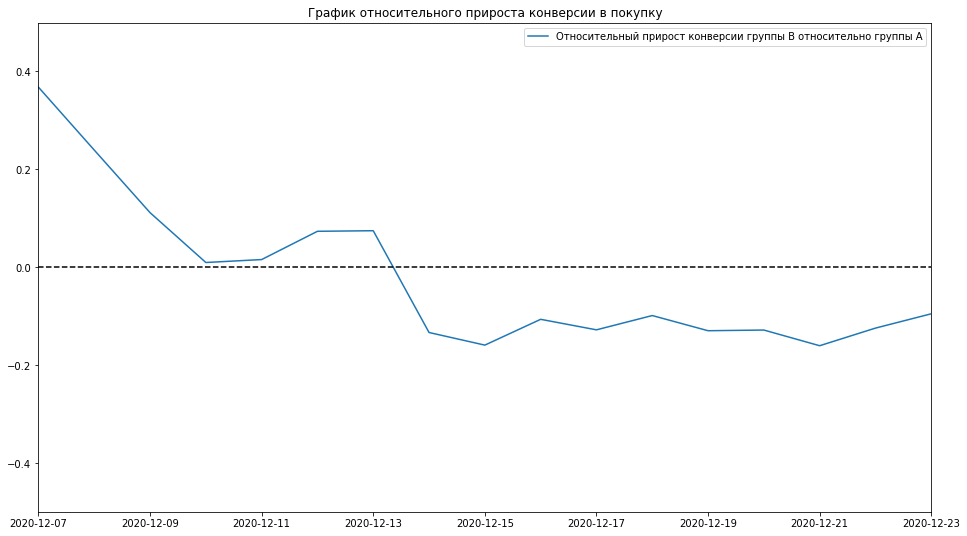

In [173]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = user_data.query('event_name == "purchase"')[['user_id', 'date', 'group', 'details']]


visitors = user_data.groupby(by=['date', 'group']).agg({'user_id':'nunique'})\
    .rename(columns={'user_id':'visitors'}).reset_index()
visitors.columns = ['date', 'group', 'visitors']


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'user_id': 'nunique',
            'details': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['buyers'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.title('График относительного прироста конверсии в покупку')


plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.103, color='grey', linestyle='--')
plt.axis(["2020-12-07", '2020-12-23', -0.5, 0.5])



plt.show()

Результат по конверсии в покупку у группы В хуже

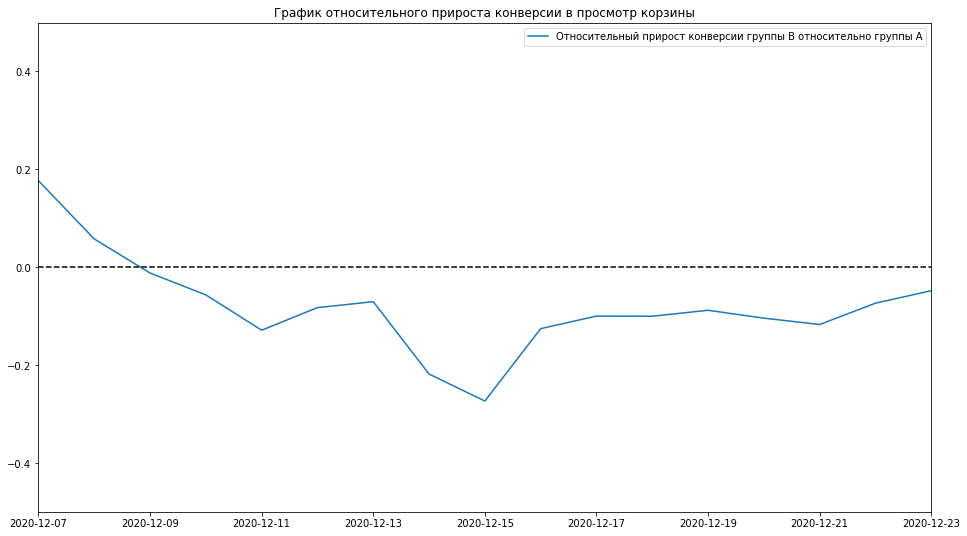

In [174]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = user_data.query('event_name == "product_cart"')[['user_id', 'date', 'group', 'details']]


visitors = user_data.groupby(by=['date', 'group']).agg({'user_id':'nunique'})\
    .rename(columns={'user_id':'visitors'}).reset_index()
visitors.columns = ['date', 'group', 'visitors']


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'user_id': 'nunique',
            'details': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['buyers'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.title('График относительного прироста конверсии в просмотр корзины')


plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.05, color='grey', linestyle='--')
plt.axis(["2020-12-07", '2020-12-23', -0.5, 0.5])



plt.show()

Результат по конверсии в просмотр корзины у группы В хуже

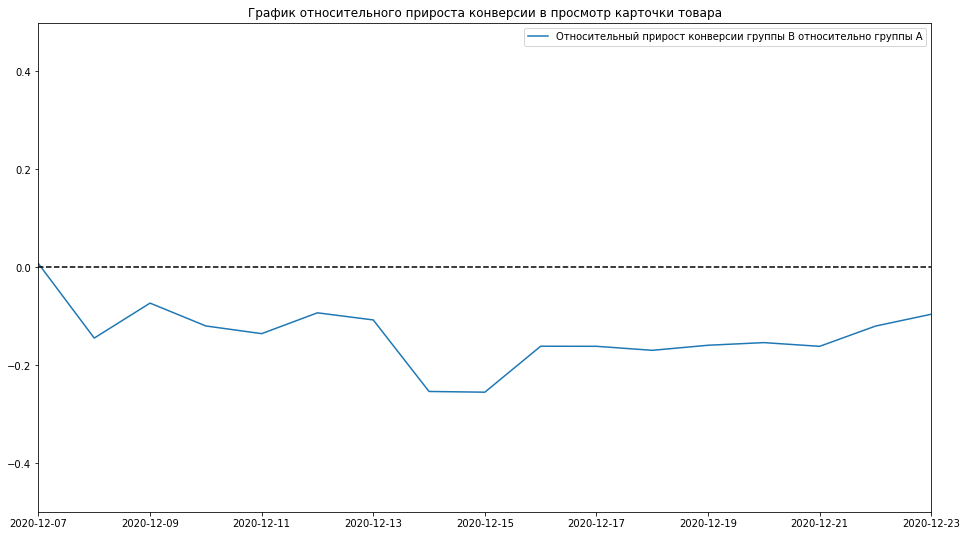

In [175]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = user_data.query('event_name == "product_page"')[['user_id', 'date', 'group', 'details']]


visitors = user_data.groupby(by=['date', 'group']).agg({'user_id':'nunique'})\
    .rename(columns={'user_id':'visitors'}).reset_index()
visitors.columns = ['date', 'group', 'visitors']


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'user_id': 'nunique',
            'details': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['buyers'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.title('График относительного прироста конверсии в просмотр карточки товара')


plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.048, color='grey', linestyle='--')
plt.axis(["2020-12-07", '2020-12-23', -0.5, 0.5])



plt.show()

Группа B показывает результат хуже группы A по конверсии в на всех этапах

Вывод по оценке результатов А/В теста:  
Конверсия в на всех этапах меньше у группы В

## Вывод

Вывод по предобработке:
- Столбцы, содержащие даты, преобразованы к типу datetime
- Пропуски в таблице events столбце details заменены значением 0, данное поле содержит информацию о сумме заказа, поэтому актуально только для события purchase.
- Явных дубликатов в таблицах не найдено
- Получена таблица user_data как объединение таблиц events, participants, new_users по user_id через left join
- В таблице user_data добавлен столбец date, содержащий дату события, извлеченную из event_dt
- Удалены выбросы из столбца details таблицы user_data, считаем выбросами значения details больше 99 процентиля


Вывод по проверке:  
Данные примерно соответствуют ТЗ. Не хватает данных за 5 дней (31.12 - 4.01), аудитория теста 10% новых пользователей (вместо 15% по ТЗ: всего 61 тыс новых пользователей, среди них 6 тыс участвуют в тесте), группы теста не пересекаются, есть пересечения групп с новогодними акциями

Вывод по исследовательскому анализу данных:
- Среднее число событий на пользователя в группе А немного выше
- Распределение числа событий в группе А напоминает нормальное, в группе В - равномерное

Вывод по оценке результатов А/В теста:  
Конверсия в на всех этапах меньше у группы В

Нужно найти объяснение аномалии с конверсиями в группе A. Проанализировать, почему в группе В конверсии ниже.